In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd

drive.mount('/content/drive')
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Academic/ML/lab5/data/winequality-red.csv', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
  data['quality'] = data['quality'].map({'bad' : 0, 'good' : 1, 'very_bad': -1, 'very_good': 2})
  data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
X = data.drop('quality', axis = 1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_not_scaled = X_train
X_test_not_scaled = X_test


X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.svm import LinearSVC

features_standardized = X_train[:,:2]
# Создать опорно-векторный классификатор
svc = LinearSVC(C=1.0, dual=True)
# Натренировать модель
model = svc.fit(features_standardized, y_train)

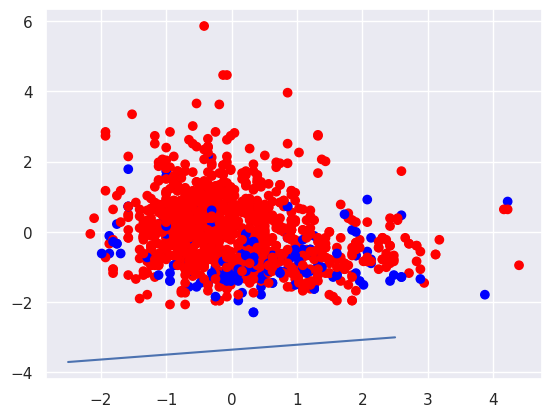

In [ ]:
# Загрузить библиотеку
from matplotlib import pyplot as pit


# Вывести точки данных на график и расцветить, используя их класс
color = ["red" if C == 0 else "blue" for C in y_train]
pit.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Создать гиперплоскость
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx-(svc.intercept_[0]) / w[1]

# Начертить гиперплоскость
pit.plot(xx, yy)
pit. show ()

Пусть требуется обучить опорно-векторный классификатор, но ваши классы линейно неразделимы.

In [ ]:
# Загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np

features = X_train[:,:2]
# Cгенерируем линейно разделимые классы
target_xor = np.logical_xor(features[:, 0] > 0 , features[:, 1] > 0 )
target = np.where(target_xor, 0, 1)

# Создать опорно-векторную машину  с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор
model = svc.fit(features, target)

Будем использовать функцию, которая выводит на график наблюдения и гиперплоскость границы решения двумерного пространства.

In [ ]:
# Выведем на график наблюдения и гиперплоскость границы решения
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as pit

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), label=cl)


Рассмотрим данные, содержащие два признака (т. е. две размерности) и вектор целей с классом каждого наблюдения. Учтем, что классы назначены так, что они линейно неразделимы. То есть нет прямой линии, которую мы могли бы провести, чтобы разделить два класса.

Создадим классификатор опорно-векторной машины с линейным ядром:

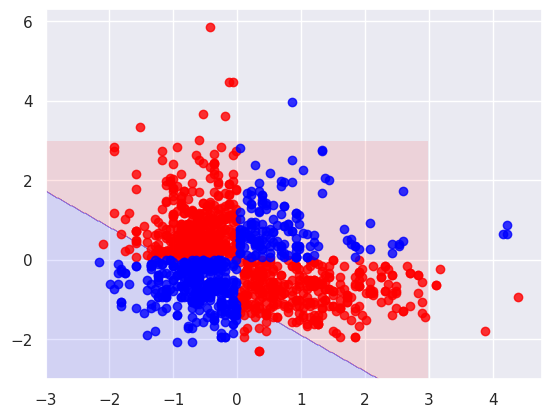

In [ ]:
# Создать опорно-векторный классификатор с линейным ядром
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Натренируем модель
svc_linear.fit(features, target)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=0, shrinking=True,
tol=0.001, verbose=False)

plot_decision_regions(features, target, classifier=svc_linear)
pit.show()


Видно, линейная гиперплоскость очень плохо справилась с разделением двух классов Теперь давайте вместо линейного ядра подставим радиально-базисное функциональное ядро и используем его для того, чтобы обучить новую модель

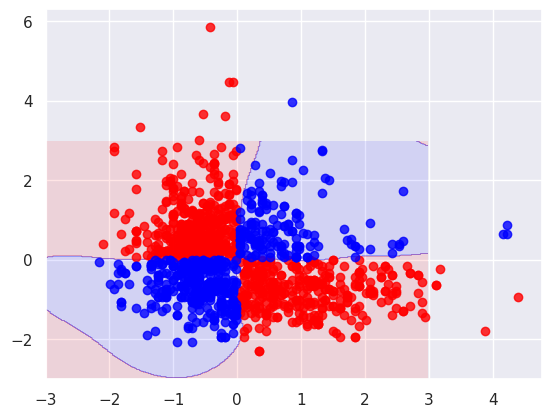

In [ ]:
# Создать опорно-векторную машину с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор
model = svc.fit(features, target)

# Вывести на график наблюдения и гиперплоскость
plot_decision_regions(features, target, classifier=svc)
pit.show()

Применив радиально-базисное функциональное ядро, мы смогли создать границу решения, способную справиться с разделением двух классов гораздо лучше, чем линейное ядро.

В библиотеке scikit-leam можно выбрать требуемое ядро с помощью параметра kernel. После того как мы выберем ядро, нам нужно указать соответствующие параметры ядра, такие как значение d (используя параметр степени degree) в полиномиальных ядрах и гамма (используя параметр gamma) в радиально-базисных функциональных ядрах. Нам также нужно задать штрафной параметр С. Во время тренировки модели в большинстве случаев все они должны рассматриваться как гиперпараметры, при этом, чтобы определить комбинацию их значений, которая производит модель с наилучшей результативностью, мы должны использовать методы отбора модели

# РАЗМЫТИЕ ОТСТУПОВ

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Academic/ML/lab5/data/winequality-red.csv', delimiter=';')
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
data['quality'] = data['quality'].map({'bad' : 0, 'good' : 1})

X = data.drop('quality', axis = 1)
y = data['quality']
test_ds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Деревья решений и случайные леса

In [ ]:
from sklearn.datasets import make_blobs
# X, y = make_blobs(n_samples=100, centers=4, random_state=0, cluster_std=1.0)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Рисуем обучающие точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Обучаем оцениватель
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Создаем цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
# visualize_classifier(DecisionTreeClassifier(), X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
# visualize_classifier(bag, X, y)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
# visualize_classifier(model, X, y)

# Выбор оптимальной модели

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}

    CV_model = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            cv=5,
                            scoring='f1',
                            n_jobs=-1,
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']

    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error,
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('f1')
        plt.show()

    return means, error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]
param_scales = ['log', 'ordinary']

Fitting 5 folds for each of 8 candidates, totalling 40 fits


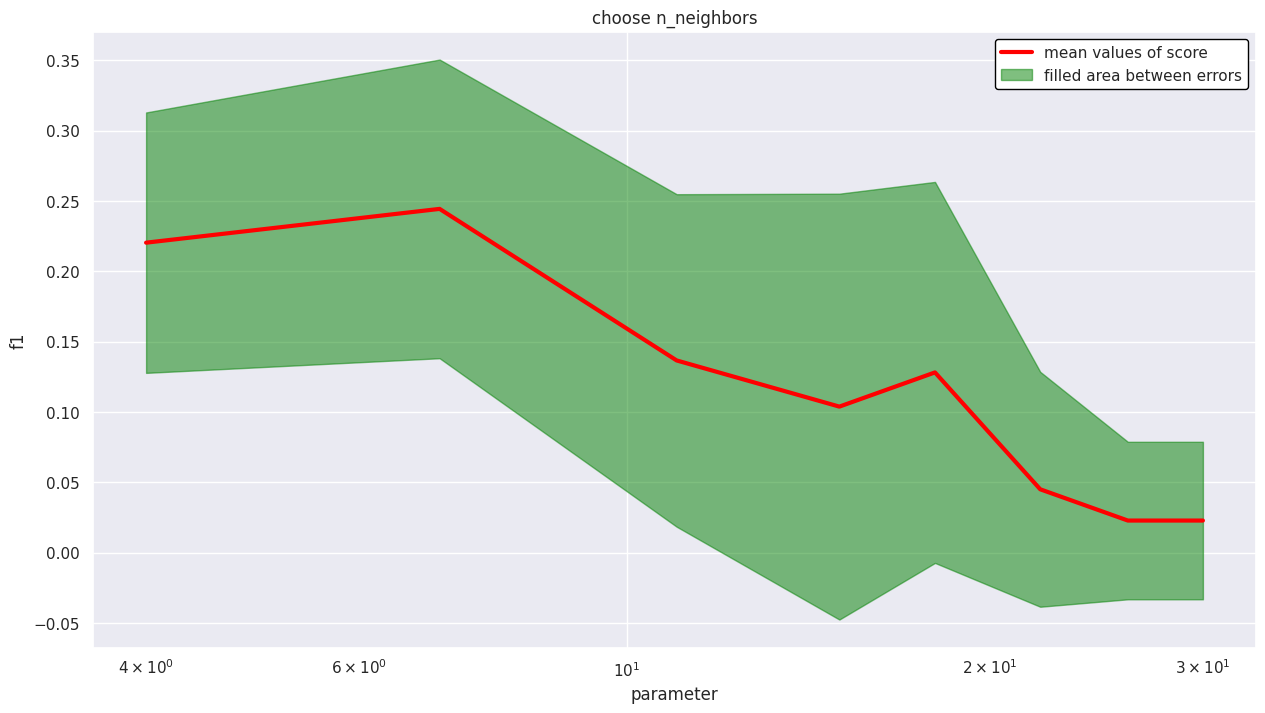

Fitting 5 folds for each of 29 candidates, totalling 145 fits


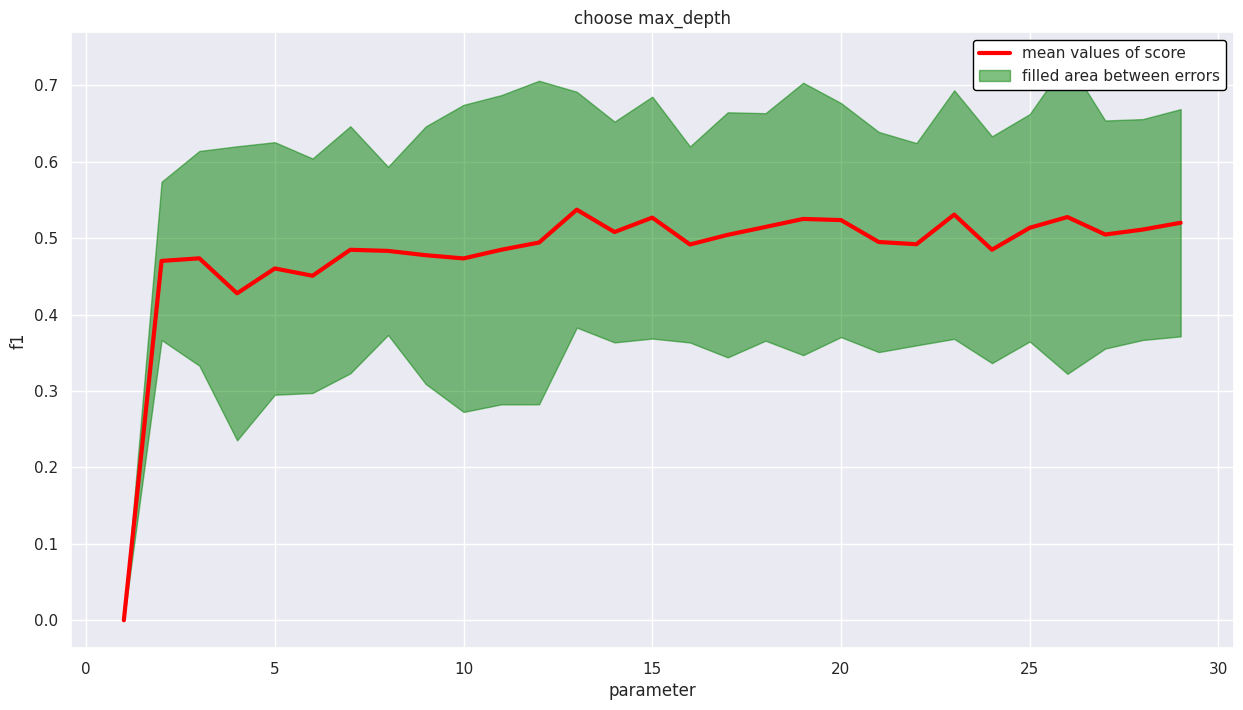

In [ ]:
for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

In [ ]:
# max_trees = 100

# values = np.arange(max_trees) + 1

# kf = KFold(n_splits=2, shuffle=True, random_state=1234)

# global_scores = []

# print(kf.split(X_train))
# print(X_train)

# for train_indices, val_indices in tqdm(kf.split(X_train), total=2):
#     scores = []

#     print(train_indices)

#     X_train_kf = X_train[train_indices]
#     y_train_kf = y_train[train_indices]

#     X_val_kf = X_train[val_indices]
#     y_val_kf = y_train[val_indices]

#     forest = RandomForestClassifier(n_estimators=max_trees)
#     forest.fit(X_train_kf, y_train_kf)
#     trees = forest.estimators_

#     for number_of_trees in tqdm(values, leave=False):
#         thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)

#         thinned_forest.n_classes_ = 2
#         thinned_forest.estimators_ = trees[:number_of_trees]

#         scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))

#     scores = np.array(scores)

#     global_scores.append(scores)

# global_scores = np.stack(global_scores, axis=0)

In [ ]:
# mean_cross_val_score = global_scores.mean(axis=0)
# std_cross_val_score = global_scores.std(axis=0)

# plt.figure(figsize=(15,8))
# plt.title('Качество случайного леса')

# plt.plot(values, mean_cross_val_score, label='средние значения', color='red', lw=3)
# plt.fill_between(values,
#                  mean_cross_val_score - 2 * std_cross_val_score,
#                  mean_cross_val_score + 2 * std_cross_val_score,
#                  color='green',
#                  label='область между ошибками',
#                  alpha=0.5)
# legend_box = plt.legend(framealpha=1).get_frame()
# legend_box.set_facecolor("white")
# legend_box.set_edgecolor("black")
# plt.xlabel('Количество деревьев')
# plt.ylabel('roc-auc')

# plt.show()